### Consider only columns below and prepare a prediction model for predicting Price.

### Corolla<-Corolla[("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Read the data
data = pd.read_csv("D:/1.0 Studies/DataScience_Excelr/Assignment7_MultipleRegression/ToyotaCorolla.csv",
                   encoding= 'unicode_escape', index_col=0)
data.shape

(1436, 37)

In [3]:
Toyota =data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [4]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 112.2 KB


In [5]:
Toyota[Toyota.duplicated()].shape

(1, 9)

In [6]:
Toyota[Toyota.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
115,24950,8,13253,116,2000,5,5,234,1320


In [7]:
Toyota_cleaned1=Toyota.drop_duplicates() #Remove duplicates

In [8]:
Toyota_cleaned1[Toyota_cleaned1.isnull().any(axis=1)].head() #Checking NaN anywhere in the array

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,


In [9]:
np.round(Toyota_cleaned1.describe(),2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00
mean,10720.92,55.98,68571.78,101.49,1576.56,4.03,5.03,87.02,1072.29
std,3608.73,18.56,37491.09,14.98,424.39,0.95,0.19,40.96,52.25
min,4350.00,1.00,1.00,69.00,1300.00,2.00,3.00,19.00,1000.00
25%,8450.00,44.00,43000.00,90.00,1400.00,3.00,5.00,69.00,1040.00
50%,9900.00,61.00,63451.00,110.00,1600.00,4.00,5.00,85.00,1070.00
75%,11950.00,70.00,87041.50,110.00,1600.00,5.00,5.00,85.00,1085.00
max,32500.00,80.00,243000.00,192.00,16000.00,5.00,6.00,283.00,1615.00


In [10]:
Toyota_cleaned1['HP'].value_counts()

110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
73       1
71       1
Name: HP, dtype: int64

In [11]:
Corr = Toyota_cleaned1.corr()
Corr

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


Age and KM, Weight and Quarterly Tax seem correlated

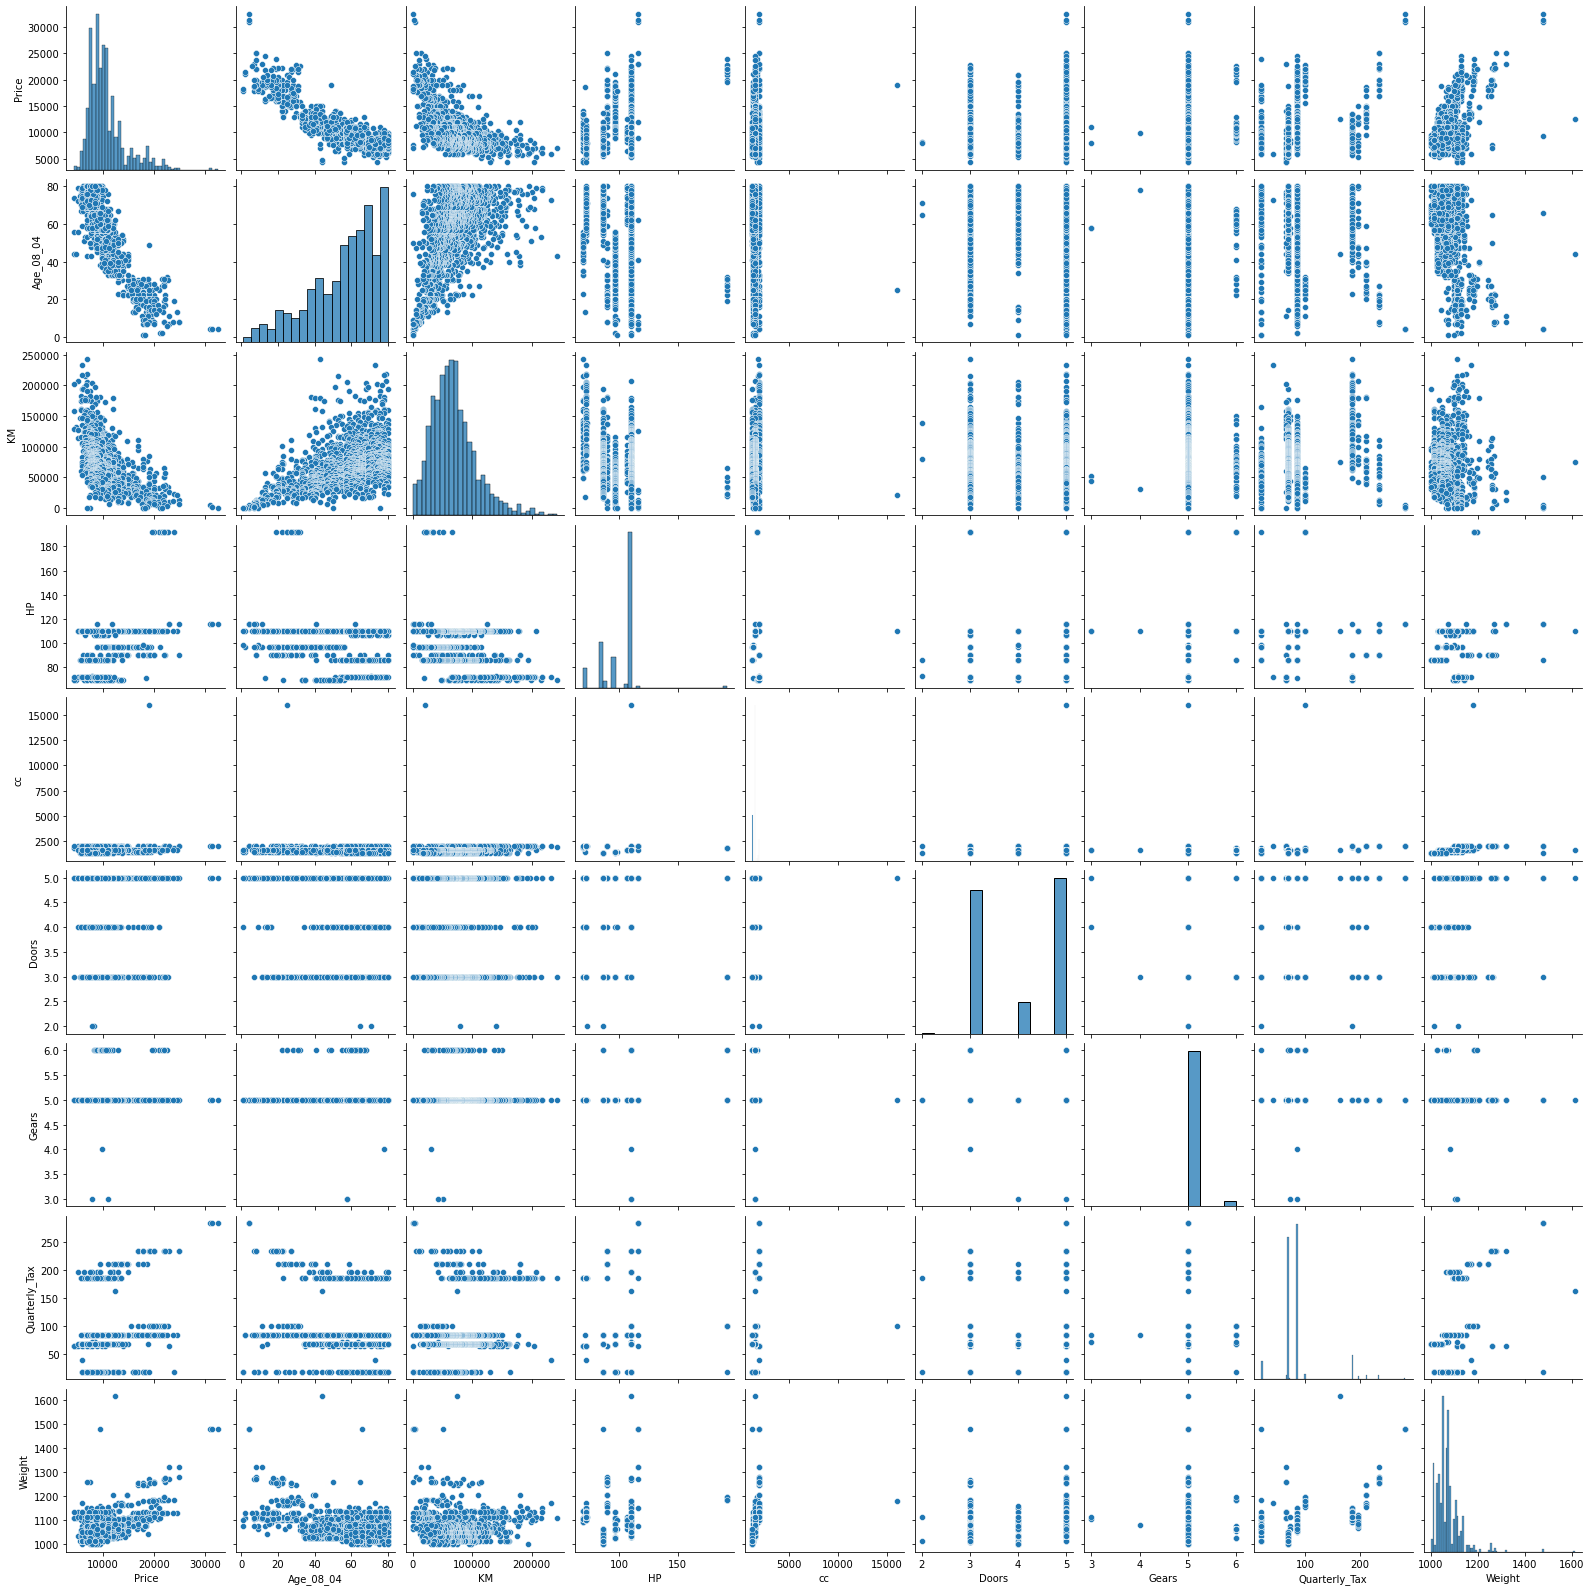

In [12]:
sns.pairplot(Toyota_cleaned1)

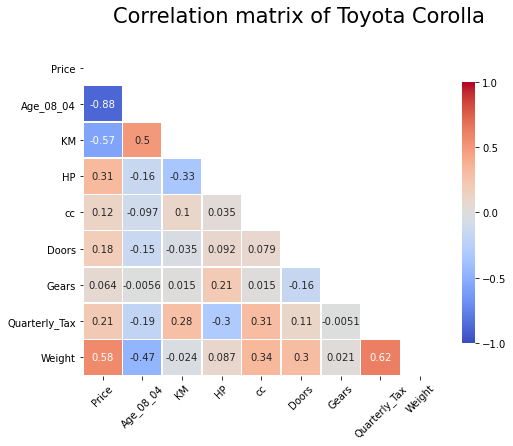

In [13]:
df =Toyota_cleaned1.iloc[:,0:9]
corr = df.corr()

# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            cbar_kws = {'shrink': 0.8,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin=-1, vmax=1, 
            annot = True,
            annot_kws = {"size": 10},
            center=0, linewidths=.5)

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
f.suptitle('Correlation matrix of Toyota Corolla', fontsize=21)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [14]:
#Doors, HP, Gears, CC should be categorical??

In [15]:
# Considering all the variables and creating the model
model_v1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_cleaned1).fit()
model_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        07:56:40   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#t and p-Values
print(model_v1.tvalues, '\n', model_v1.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [17]:
#R squared values
(model_v1.rsquared,model_v1.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [18]:
y_pred = model_v1.predict(Toyota_cleaned1)
y_pred
#RMSE 1 
np.sqrt((np.mean((y_pred-Toyota_cleaned1.Price)**2)))

1337.5902507310757

### Analyse the correlations bw variables (subsets) 
### Age, KM, Weight and Tax

In [19]:
#Age and Price are highly correlated. Check whether Age varies with KM, Weight and Tax too.

In [20]:
#Age KM
model_Age=smf.ols('Age_08_04~KM+Weight+Quarterly_Tax',data=Toyota_cleaned1).fit()
model_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Age_08_04   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     416.3
Date:                Wed, 12 May 2021   Prob (F-statistic):          2.25e-194
Time:                        07:56:40   Log-Likelihood:                -5777.4
No. Observations:                1435   AIC:                         1.156e+04
Df Residuals:                    1431   BIC:                         1.158e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       192.1911      9.299     20.667      0.000     173.949     210.433
KM                0.0003   1.03e-05     24.995      0.000       0.000       0.000
Weight           -0.1400      0.009    -15.399      0.000      -0.158      -0.122
Quarterly_Tax    -0.0436      0.012     -3.604      0.000      -0.067      -0.020
==============================================================================
Omnibus:                        7.264   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                9.428
Skew:                           0.000   Prob(JB):                      0.00897
Kurtosis:                       3.397   Cond. No.                     2.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Weight on KM and Tax
model_Weight=smf.ols('Weight~KM+Quarterly_Tax',data=Toyota_cleaned1).fit()
model_Weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     541.1
Date:                Wed, 12 May 2021   Prob (F-statistic):          9.25e-176
Time:                        07:56:40   Log-Likelihood:                -7308.8
No. Observations:                1435   AIC:                         1.462e+04
Df Residuals:                    1432   BIC:                         1.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1017.1953      2.786    365.045      0.000    1011.729    1022.661
KM               -0.0003    2.9e-05    -10.467      0.000      -0.000      -0.000
Quarterly_Tax     0.8721      0.027     32.875      0.000       0.820       0.924
==============================================================================
Omnibus:                     1219.637   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63335.826
Skew:                           3.630   Prob(JB):                         0.00
Kurtosis:                      34.727   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#In model_v1 the p value of Doors (0.98) suggest that number of doors don't have any influence over price estimation. 
#We can drop 'Doors' from our variation.

In [23]:
Toyota_cleaned2=Toyota_cleaned1.drop('Doors',axis=1)
Toyota_cleaned2

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
Id,,,,,,,,
1,13500,23,46986,90,2000,5,210,1165
2,13750,23,72937,90,2000,5,210,1165
3,13950,24,41711,90,2000,5,210,1165
4,14950,26,48000,90,2000,5,210,1165
5,13750,30,38500,90,2000,5,210,1170
...,...,...,...,...,...,...,...,...
1438,7500,69,20544,86,1300,5,69,1025
1439,10845,72,19000,86,1300,5,69,1015
1440,8500,71,17016,86,1300,5,69,1015


In [24]:
# Considering all the variables and creating the model
model_v2=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_cleaned2).fit()
model_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1279.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        07:56:40   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5473.6812   1410.804     -3.880      0.000   -8241.154   -2706.209
Age_08_04      -121.7137      2.614    -46.568      0.000    -126.841    -116.587
KM               -0.0207      0.001    -16.566      0.000      -0.023      -0.018
HP               31.5800      2.810     11.240      0.000      26.069      37.091
cc               -0.1185      0.090     -1.317      0.188      -0.295       0.058
Gears           598.5773    193.312      3.096      0.002     219.371     977.784
Quarterly_Tax     3.8611      1.307      2.955      0.003       1.298       6.424
Weight           16.8493      1.035     16.283      0.000      14.819      18.879
==============================================================================
Omnibus:                      149.544   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              999.121
Skew:                          -0.204   Prob(JB):                    1.11e-217
Kurtosis:                       7.067   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
y_pred2 = model_v2.predict(Toyota_cleaned2)
y_pred2
#RMSE 2 
np.sqrt((np.mean((y_pred2-Toyota_cleaned2.Price)**2)))

1337.5904990808087

In [26]:
mean_squared_error(Toyota_cleaned2.Price, y_pred2, squared=False)

1337.5904990808085

### Calculate Variance Inflation Factor

In [27]:
Toyota_cleaned2.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [28]:
rsq_Age = smf.ols('Age_08_04~KM+HP+cc+Gears+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared  
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~KM+Age_08_04+cc+Gears+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~HP+KM+Age_08_04+Gears+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Gears = smf.ols('Gears~cc+HP+KM+Age_08_04+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Gears+cc+HP+KM+Age_08_04+Weight',
                 data=Toyota_cleaned2).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)


rsq_Weight = smf.ols('Weight~Quarterly_Tax+Gears+cc+HP+KM+Age_08_04',
                 data=Toyota_cleaned2).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04', 'KM', 'HP', 'cc', 'Gears', 'Quarterly_Tax',
       'Weight'],
      'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Gears,vif_Quarterly_Tax,vif_Weight]}

Vif_frame = np.round(pd.DataFrame(d1),2)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.88
1,KM,1.76
2,HP,1.41
3,cc,1.16
4,Gears,1.06
5,Quarterly_Tax,2.28
6,Weight,2.33


VIFs are not very high so all variables not correlated and are OK for consideration.

### Residual Analysis, Test for Normality, Q-Q Plot

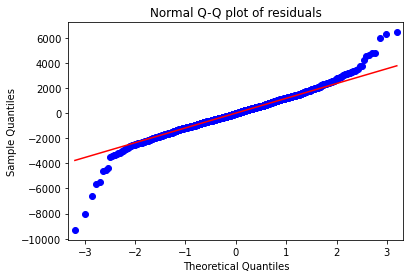

In [29]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_v2.resid, line ='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
list(np.where(model_v2.resid>1000)) # A difference of $1000

[array([   7,    8,   13,   14,   15,   16,   17,   18,   19,   20,   23,
          26,   28,   29,   41,   45,   49,   51,   52,   53,   58,   62,
          63,   64,   65,   66,   68,   72,   74,   76,   77,   80,   81,
          89,   91,   94,  100,  102,  106,  109,  110,  111,  112,  114,
         118,  119,  120,  122,  124,  135,  137,  138,  140,  141,  142,
         143,  145,  146,  147,  148,  150,  152,  153,  155,  157,  159,
         160,  162,  164,  165,  166,  167,  170,  171,  173,  176,  177,
         178,  181,  182,  189,  193,  222,  236,  252,  261,  278,  301,
         303,  341,  344,  353,  358,  397,  398,  408,  426,  428,  429,
         438,  439,  447,  460,  467,  472,  478,  487,  493,  505,  511,
         520,  522,  528,  533,  540,  548,  556,  558,  562,  603,  604,
         609,  631,  635,  637,  638,  639,  655,  657,  658,  662,  666,
         667,  668,  672,  689,  692,  693,  695,  702,  709,  711,  716,
         725,  729,  731,  737,  748, 

### Residual Plot for Homoscedasticity

In [31]:
#Plot standardized values of residuals and fitted values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

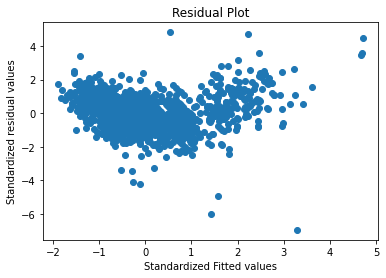

In [32]:
plt.scatter(get_standardized_values(model_v2.fittedvalues),
            get_standardized_values(model_v2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

There is a moderate U shaped pattern

Our data set is not homoscedastic

### Detection of Influence/Outliers
### Cook's Distance

In [33]:
model_influence = model_v2.get_influence()
(c, _) = model_influence.cooks_distance

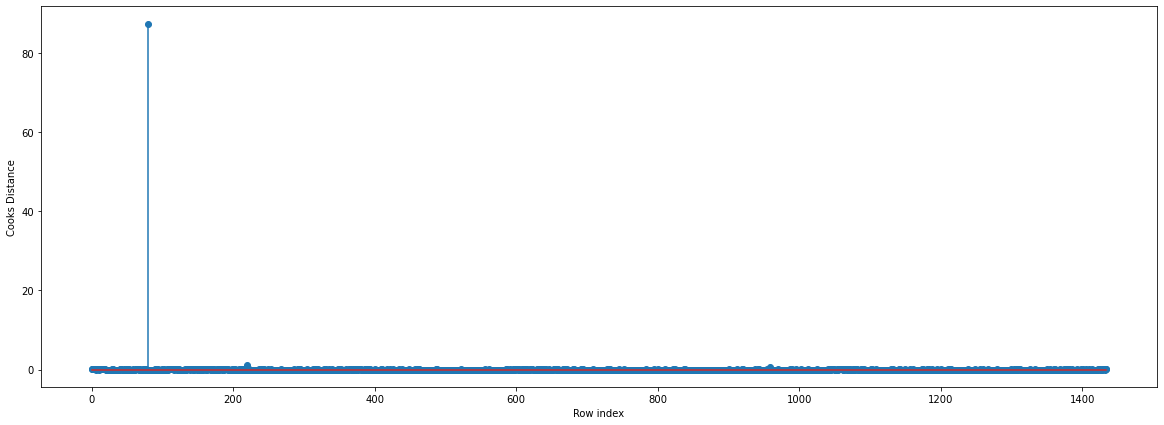

In [34]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyota_cleaned2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
#Check how lengths look like
model_influence = model_v2.get_influence()
(c, _) = model_influence.cooks_distance

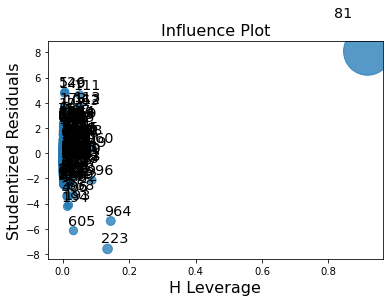

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_v2)
plt.show() #How do I increase the size of the plot?

In [37]:
k = Toyota_cleaned2.shape[1]
n = Toyota_cleaned2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
(np.argmax(c),np.max(c))

(80, 87.40014550950544)

In [38]:
np.round(c,3)

array([0.007, 0.004, 0.005, ..., 0.   , 0.001, 0.012])

In [39]:
leverage_cutoff

0.018815331010452963

In [40]:
np.argwhere(c>.018)

array([[  14],
       [  16],
       [  49],
       [  80],
       [ 109],
       [ 110],
       [ 111],
       [ 140],
       [ 190],
       [ 191],
       [ 220],
       [ 401],
       [ 522],
       [ 600],
       [ 653],
       [ 959],
       [ 990],
       [1057]], dtype=int64)

In [41]:
Toyota_cleaned2[Toyota_cleaned2.index.isin([14,16,49,80,109,110,111,140,190,191,220,401,522,600,653,959,990,1057])] 
#Just to check. These point could be influencers.

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
Id,,,,,,,,
14,21500,31,23000,192,1800,6,100,1185
16,22000,28,18739,192,1800,6,100,1185
49,17950,22,72215,90,2000,5,234,1255
80,14900,30,22000,97,1400,5,85,1110
109,17950,20,7187,110,1600,5,85,1105
111,32500,4,1,116,2000,5,283,1480
140,23000,11,25000,116,2000,5,64,1320
190,11950,40,179860,90,2000,5,210,1205
191,7750,43,178858,110,1600,5,197,1084


### Improving the model

In [42]:
#Drop 80,81,223 and 964 observations
Toyota_cleaned3=Toyota_cleaned2.drop(Toyota_cleaned2.index[[80]],axis=0).reset_index()

In [43]:
#Toyota_cleaned3=Toyota_cleaned3.drop(['index'],axis=1)

In [44]:
# Build New Model
model_v3=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_cleaned3).fit()
model_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1340.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        07:56:48   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1426   BIC:                         2.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6225.7366   1383.114     -4.501      0.000   -8938.893   -3512.581
Age_08_04      -120.5104      2.561    -47.058      0.000    -125.534    -115.487
KM               -0.0178      0.001    -13.986      0.000      -0.020      -0.015
HP               39.0416      2.899     13.468      0.000      33.355      44.728
cc               -2.4918      0.306     -8.135      0.000      -3.093      -1.891
Gears           552.2590    189.176      2.919      0.004     181.166     923.352
Quarterly_Tax     8.9718      1.426      6.293      0.000       6.175      11.768
Weight           19.8642      1.079     18.417      0.000      17.748      21.980
==============================================================================
Omnibus:                      235.248   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2493.347
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                       9.408   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
y_pred3 = model_v3.predict(Toyota_cleaned3)
mean_squared_error(Toyota_cleaned3.Price, y_pred3, squared=False)

1308.3692925764876

In [46]:
#Check how lengths look like
model_influence = model_v3.get_influence()
(c3, _) = model_influence.cooks_distance
(np.argmax(c3),np.max(c3))

(219, 2.3039534822944514)

In [47]:
np.where(c3>.5)

(array([219, 958], dtype=int64),)

In [48]:
(np.argmax(c3),np.max(c3))

(219, 2.3039534822944514)

In [49]:
np.argwhere(c3>0.5)

array([[219],
       [958]], dtype=int64)

In [50]:
#Drop observation no. 219
Toyota_cleaned4=Toyota_cleaned3.drop(Toyota_cleaned3.index[[219,958]],axis=0).reset_index()

In [51]:
# Build New Model
model_v4=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_cleaned4).fit()
model_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1537.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        07:56:48   Log-Likelihood:                -12223.
No. Observations:                1432   AIC:                         2.446e+04
Df Residuals:                    1424   BIC:                         2.450e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.443e+04   1439.114    -10.029      0.000   -1.73e+04   -1.16e+04
Age_08_04      -112.4497      2.486    -45.233      0.000    -117.326    -107.573
KM               -0.0172      0.001    -14.300      0.000      -0.020      -0.015
HP               35.8928      2.749     13.058      0.000      30.501      41.285
cc               -3.6557      0.301    -12.145      0.000      -4.246      -3.065
Gears           580.4961    178.210      3.257      0.001     230.914     930.078
Quarterly_Tax     5.4926      1.374      3.997      0.000       2.797       8.188
Weight           29.2226      1.232     23.721      0.000      26.806      31.639
==============================================================================
Omnibus:                      109.591   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.369
Skew:                          -0.056   Prob(JB):                    3.80e-124
Kurtosis:                       6.084   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#Check how lengths look like
model_influence = model_v4.get_influence()
(c4, _) = model_influence.cooks_distance
(np.argmax(c4),np.max(c4))

(598, 0.2878177539449196)

#### Cook's distance is less than 0.5, we can stop iteration for final model

In [53]:
y_pred4 = model_v4.predict(Toyota_cleaned4)
mean_squared_error(Toyota_cleaned4.Price, y_pred4, squared=False)

1232.28059263698

### Split the data and test the model

In [84]:
x = Toyota_cleaned4[['Age_08_04','Weight','KM','HP','cc','Gears','Quarterly_Tax']].values.reshape(-1,7)
y = Toyota_cleaned4[['Price']].values.reshape(-1,1)

In [96]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model_v5 = lm.fit(x, y)

#train-test splilt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
trainmodel = lm.fit(x_train,y_train)
testmodel = lm.fit(x_test,y_test)
y_pred5 = trainmodel.predict(x_test)

In [102]:
round(mean_squared_error(y_test, y_pred5, squared=False),2) #RMSE

1253.67